In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

from scipy.interpolate import interp1d

## Cherenkov yields

In [2]:
alpha = 1/137.035

def d2Ndxdlamb(lambd, n, z, beta): #lambda espresso in nm. return light yield per cm per nm
    return 2*np.pi*(z**2)*alpha*(1/lambd**2)*(1-1/((n*beta)**2))*1E9*1E-2

def dNdx(lambd1, lambd2, n, z, beta): #lambda espresso in nm. return light yield per cm in un intervallo di lunghezze d'onda
    return 2*np.pi*(z**2)*alpha*(1/lambd1-1/lambd2)*(1-1/((n*beta)**2))*1E9*1E-2

## Acquired spectra

In [58]:
sipm = pd.read_csv('SiPM_pde_data/13360-3050pe_pde.csv', names=['lambd', 'pde'], sep='; ', decimal=',')
i_sipm_pde = interp1d(sipm.lambd, sipm.pde, bounds_error=False, fill_value=0)

/tmp/ipykernel_153326/2861310523.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  sipm = pd.read_csv('SiPM_pde_data/13360-3050pe_pde.csv', names=['lambd', 'pde'], sep='; ', decimal=',')


In [59]:
sr=np.concatenate([np.arange(0, 20), np.arange(1180,1228)])

e_BGO = pd.read_table(r'../crystals-optical-characterization/crystal_emission/BGO.csv', skiprows=sr, sep=';', decimal=',', names=['wl', 'e'])
e_BSO = pd.read_table(r'../crystals-optical-characterization/crystal_emission/BSO.csv', skiprows=sr, sep=';', decimal=',', names=['wl', 'e'])
e_PWO = pd.read_table(r'../crystals-optical-characterization/crystal_emission/PWO_320_900nm.csv', skiprows=sr, sep=';', decimal=',', names=['wl', 'e'])
e_LYSO = pd.read_table(r'../crystals-optical-characterization/crystal_emission/LYSO_medium.csv', skiprows=sr, sep=';', decimal=',', names=['wl', 'e'])
e_GAGG = pd.read_table(r'../crystals-optical-characterization/crystal_emission/GAGG_medium_440nm.csv', skiprows=sr, sep=';', decimal=',', names=['wl', 'e'])
e_GAGG = pd.read_table(r'../crystals-optical-characterization/crystal_emission/GAGG_medium_300nm.csv', skiprows=sr, sep=';', decimal=',', names=['wl', 'e'])


In [60]:
t_BGO = pd.read_table(r'../crystals-optical-characterization/crystal_transmittance/BGO.Sample.csv', skiprows=2,sep=',', names=['wl', 't'])
t_PWO = pd.read_table(r'../crystals-optical-characterization/crystal_transmittance/PWO.Sample.csv', skiprows=2,sep=',', names=['wl', 't'])
t_LYSO = pd.read_table(r'../crystals-optical-characterization/crystal_transmittance/LYSO.Sample.csv', skiprows=2,sep=',', names=['wl', 't'])
t_GAGG = pd.read_table(r'../crystals-optical-characterization/crystal_transmittance/GAGG.Sample.csv', skiprows=2,sep=',', names=['wl', 't'])


## plots

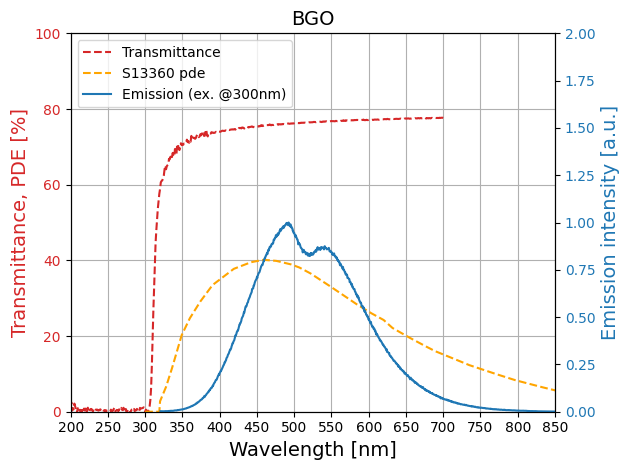

In [61]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Wavelength [nm]', fontsize=14)
ax1.set_ylabel('Transmittance, PDE [%]', color=color, fontsize=14)
ax1.plot(t_BGO.wl, t_BGO.t, '--', color=color, label='Transmittance')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim(-0, 100)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Emission intensity [a.u.]', color=color, fontsize=14)
ax2.plot(e_BGO.wl, e_BGO.e/e_BGO.e.max(), color=color, label='Emission (ex. @300nm)')
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(-0., 2)  # Adjusted ylim for better visualization

x = np.arange(300, 900, 1)
line_pde, = ax1.plot(x, i_sipm_pde(x)/1, '--', color='orange', label='S13360 pde')  # Assuming i_sipm_pde is defined elsewhere

# Combine handles and labels for legend
handles, labels = ax1.get_legend_handles_labels()
handles.extend(ax2.get_legend_handles_labels()[0])  # Only the handles are needed from the second legend
labels.extend(ax2.get_legend_handles_labels()[1])

# Create the combined legend
plt.legend(handles, labels, loc='upper left')

plt.title('BGO', size=14)

ax1.grid()
ax1.set_xticks(np.arange(200, 901, 50))
ax1.set_xlim(200, 850)
fig.tight_layout()

plt.savefig('BGO.png', dpi=300, bbox_inches='tight')
plt.show()


1141
1140


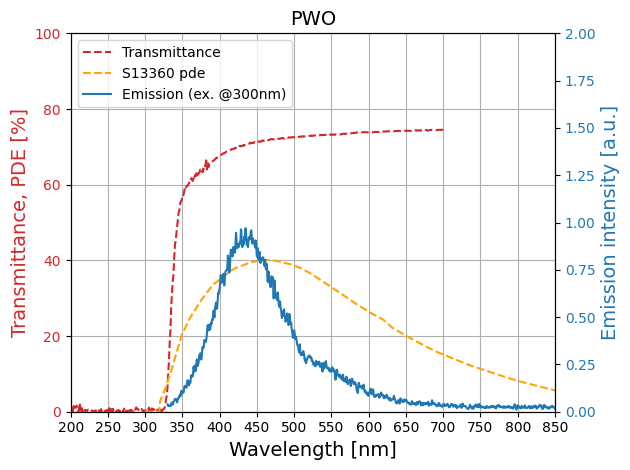

In [62]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Wavelength [nm]', fontsize=14)
ax1.set_ylabel('Transmittance, PDE [%]', color=color, fontsize=14)
ax1.plot(t_PWO.wl, t_PWO.t, '--', color=color, label='Transmittance')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim(-0, 100)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Emission intensity [a.u.]', color=color, fontsize=14)
#ax2.plot(e_PWO.wl, e_PWO.e/e_PWO.e.max(), color=color, label='Emission (ex. @300nm)')
x, y = np.array(e_PWO.wl), np.array(e_PWO.e/e_PWO.e.max())
for i in range(2):
    x = (x[:-1]+x[1:])/2
    y = (y[:-1]+y[1:])/2
    print(len(y))
ax2.plot(x, y, color=color, label='Emission (ex. @300nm)')
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(-0., 2)  # Adjusted ylim for better visualization

x = np.arange(300, 900, 1)
line_pde, = ax1.plot(x, i_sipm_pde(x)/1, '--', color='orange', label='S13360 pde')  # Assuming i_sipm_pde is defined elsewhere

# Combine handles and labels for legend
handles, labels = ax1.get_legend_handles_labels()
handles.extend(ax2.get_legend_handles_labels()[0])  # Only the handles are needed from the second legend
labels.extend(ax2.get_legend_handles_labels()[1])

# Create the combined legend
plt.legend(handles, labels, loc='upper left')

plt.title('PWO', size=14)

ax1.grid()
ax1.set_xticks(np.arange(200, 901, 50))
ax1.set_xlim(200, 850)
fig.tight_layout()

plt.savefig('PWO.png', dpi=300, bbox_inches='tight')
plt.show()


1141
1140


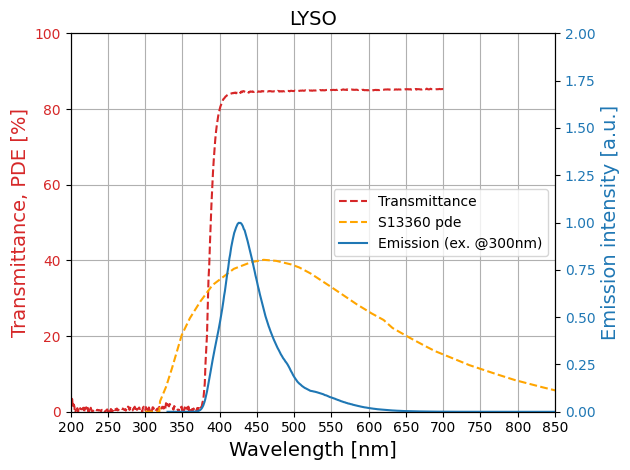

In [63]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Wavelength [nm]', fontsize=14)
ax1.set_ylabel('Transmittance, PDE [%]', color=color, fontsize=14)
ax1.plot(t_LYSO.wl, t_LYSO.t, '--', color=color, label='Transmittance')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim(-0, 100)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Emission intensity [a.u.]', color=color, fontsize=14)
#ax2.plot(e_LYSO.wl, e_LYSO.e/e_LYSO.e.max(), color=color, label='Emission (ex. @300nm)')
x, y = np.array(e_LYSO.wl), np.array(e_LYSO.e/e_LYSO.e.max())
for i in range(2):
    x = (x[:-1]+x[1:])/2
    y = (y[:-1]+y[1:])/2
    print(len(y))
ax2.plot(x, y, color=color, label='Emission (ex. @300nm)')
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(-0., 2)  # Adjusted ylim for better visualization

x = np.arange(300, 900, 1)
line_pde, = ax1.plot(x, i_sipm_pde(x)/1, '--', color='orange', label='S13360 pde')  # Assuming i_sipm_pde is defined elsewhere

# Combine handles and labels for legend
handles, labels = ax1.get_legend_handles_labels()
handles.extend(ax2.get_legend_handles_labels()[0])  # Only the handles are needed from the second legend
labels.extend(ax2.get_legend_handles_labels()[1])

# Create the combined legend
plt.legend(handles, labels, loc=5)

plt.title('LYSO', size=14)

ax1.grid()
ax1.set_xticks(np.arange(200, 901, 50))
ax1.set_xlim(200, 850)
fig.tight_layout()

plt.savefig('LYSO.png', dpi=300, bbox_inches='tight')
plt.show()


1141
1140


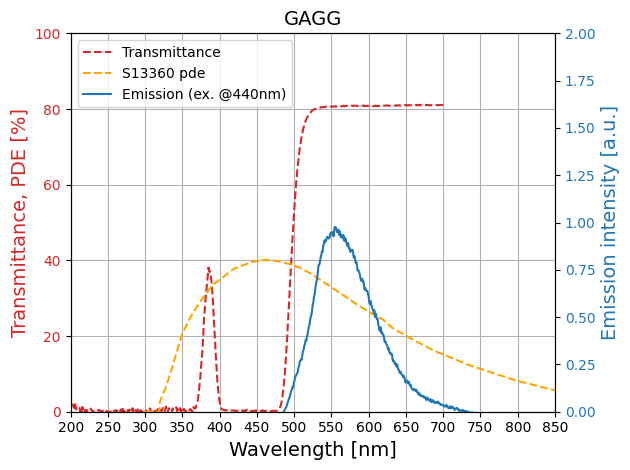

In [64]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Wavelength [nm]', fontsize=14)
ax1.set_ylabel('Transmittance, PDE [%]', color=color, fontsize=14)
ax1.plot(t_GAGG.wl, t_GAGG.t, '--', color=color, label='Transmittance')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim(-0, 100)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Emission intensity [a.u.]', color=color, fontsize=14)
#ax2.plot(e_GAGG.wl, e_GAGG.e/e_GAGG.e.max(), color=color, label='Emission (ex. @300nm)')
x, y = np.array(e_GAGG.wl), np.array(e_GAGG.e/e_GAGG.e.max())
for i in range(2):
    x = (x[:-1]+x[1:])/2
    y = (y[:-1]+y[1:])/2
    print(len(y))
ax2.plot(x, y, color=color, label='Emission (ex. @440nm)')
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(-0., 2)  # Adjusted ylim for better visualization

x = np.arange(300, 900, 1)
line_pde, = ax1.plot(x, i_sipm_pde(x)/1, '--', color='orange', label='S13360 pde')  # Assuming i_sipm_pde is defined elsewhere

# Combine handles and labels for legend
handles, labels = ax1.get_legend_handles_labels()
handles.extend(ax2.get_legend_handles_labels()[0])  # Only the handles are needed from the second legend
labels.extend(ax2.get_legend_handles_labels()[1])

# Create the combined legend
plt.legend(handles, labels, loc=2)

plt.title('GAGG', size=14)

ax1.grid()
ax1.set_xticks(np.arange(200, 901, 50))
ax1.set_xlim(200, 850)
fig.tight_layout()

plt.savefig('GAGG.png', dpi=300, bbox_inches='tight')
plt.show()


## computing yields

In [65]:
dE_mip = 2 #MeV / (g/cm2)

BGO_density = 7.13 #g/cm3
BGO_sLY = 8500 #photons/MeV
BGO_dEdx = dE_mip * BGO_density #MeV/cm 
BGO_sphotons = BGO_dEdx*BGO_sLY #photons/cm
BGO_n = 2.15
v

In [101]:
BGO_sphotons

121210.0

In [66]:
dE_mip = 2 #MeV / (g/cm2)

PWO_density = 8.28 #g/cm3
PWO_sLY = 190 #photons/MeV
PWO_dEdx = dE_mip * PWO_density #MeV/cm 
PWO_sphotons = PWO_dEdx*PWO_sLY #photons/cm
PWO_n = 2.16

In [67]:
z, beta = 1, 0.99

In [68]:
i_BGO_e = interp1d(e_BGO.wl, e_BGO.e, bounds_error=False, fill_value=0)
i_BGO_t = interp1d(t_BGO.wl, t_BGO.t, bounds_error=False, fill_value=t_BGO.t.values[0])

In [69]:
i_PWO_e = interp1d(e_PWO.wl, e_PWO.e, bounds_error=False, fill_value=0)
i_PWO_t = interp1d(t_PWO.wl, t_PWO.t, bounds_error=False, fill_value=t_PWO.t.values[0])

## BGO

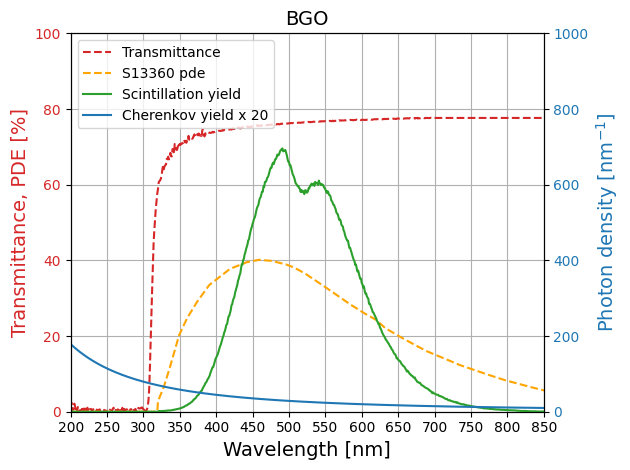

In [80]:
fig, ax1 = plt.subplots()

x = np.arange(200, 900, 1)

color = 'tab:red'
ax1.set_xlabel('Wavelength [nm]', fontsize=14)
ax1.set_ylabel('Transmittance, PDE [%]', color=color, fontsize=14)
ax1.plot(x, i_BGO_t(x), '--', color=color, label='Transmittance')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim(-0, 100)

line_pde, = ax1.plot(x, i_sipm_pde(x)/1, '--', color='orange', label='S13360 pde')  # Assuming i_sipm_pde is defined elsewhere

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Photon density [nm$^{-1}$]', color=color, fontsize=14)
ax2.plot(x, i_BGO_e(x)/(i_BGO_e(x).sum())*BGO_sphotons, '-', color='C2', label='Scintillation yield ')
ax2.plot(x, d2Ndxdlamb(x, BGO_n, z, beta)*20, '-', color=color, label='Cherenkov yield x 20')
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(-0., 1000)  # Adjusted ylim for better visualization


# Combine handles and labels for legend
handles, labels = ax1.get_legend_handles_labels()
handles.extend(ax2.get_legend_handles_labels()[0])  # Only the handles are needed from the second legend
labels.extend(ax2.get_legend_handles_labels()[1])

# Create the combined legend
plt.legend(handles, labels, loc='upper left')

plt.title('BGO', size=14)

ax1.grid()
ax1.set_xticks(np.arange(200, 901, 50))
ax1.set_xlim(200, 850)
fig.tight_layout()

plt.savefig('BGO_Cherenkov.png', dpi=300, bbox_inches='tight')
plt.show()


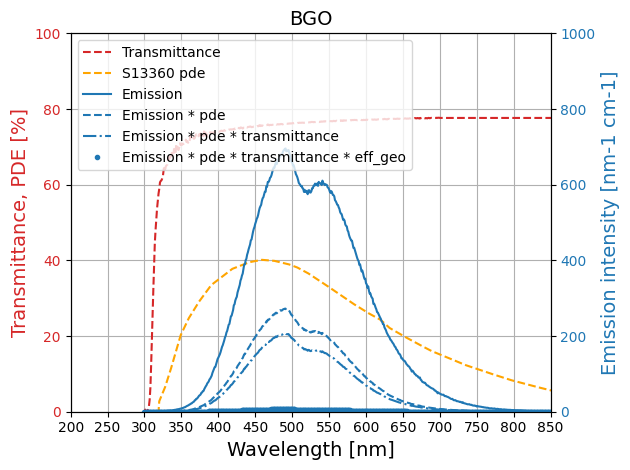

In [71]:
fig, ax1 = plt.subplots()

x = np.arange(300, 900, 1)

color = 'tab:red'
ax1.set_xlabel('Wavelength [nm]', fontsize=14)
ax1.set_ylabel('Transmittance, PDE [%]', color=color, fontsize=14)
ax1.plot(x, i_BGO_t(x), '--', color=color, label='Transmittance')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim(-0, 100)

line_pde, = ax1.plot(x, i_sipm_pde(x)/1, '--', color='orange', label='S13360 pde')  # Assuming i_sipm_pde is defined elsewhere

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Emission intensity [nm-1 cm-1]', color=color, fontsize=14)
ax2.plot(x, i_BGO_e(x)/(i_BGO_e(x).sum())*BGO_sphotons, '-', color=color, label='Emission')
ax2.plot(x, i_BGO_e(x)/(i_BGO_e(x).sum())*BGO_sphotons*i_sipm_pde(x)/100, '--', color=color, label='Emission * pde')
ax2.plot(x, i_BGO_e(x)/(i_BGO_e(x).sum())*BGO_sphotons*i_sipm_pde(x)/100*i_BGO_t(x)/100, '-.', color=color, label='Emission * pde * transmittance')
ax2.plot(x, i_BGO_e(x)/(i_BGO_e(x).sum())*BGO_sphotons*i_sipm_pde(x)/100*i_BGO_t(x)/100*eff_geo, '.', color=color, label='Emission * pde * transmittance * eff_geo')

ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(-0., 1000)  # Adjusted ylim for better visualization

# Combine handles and labels for legend
handles, labels = ax1.get_legend_handles_labels()
handles.extend(ax2.get_legend_handles_labels()[0])  # Only the handles are needed from the second legend
labels.extend(ax2.get_legend_handles_labels()[1])

# Create the combined legend
plt.legend(handles, labels, loc='upper left')

plt.title('BGO', size=14)

ax1.grid()
ax1.set_xticks(np.arange(200, 901, 50))
ax1.set_xlim(200, 850)
fig.tight_layout()

plt.show()


In [72]:
print(f'Generated Scintillation photons: {BGO_sphotons:.0f} photons/cm\n')

Generated Scintillation photons: 121210 photons/cm



In [96]:
lambd1, lambd2 = 300, 900
eff_geo = ((3*3)/(12*12))*0.5
x = np.arange(lambd1, lambd2)
scint_phot = np.sum(i_BGO_e(x)/i_BGO_e(x).sum()*BGO_sphotons*i_sipm_pde(x)/100*i_BGO_t(x)/100*eff_geo)
print(f'scint photons * pde * transmittance * eff_geo in [{lambd1}-{lambd2}] nm: {scint_phot:.2f} photons/cm\n')

scint photons * pde * transmittance * eff_geo in [300-900] nm: 973.92 photons/cm



In [100]:
scint_phot*1.2/300 # fattore che ammazza rispetto a simulazione

3.8956709468732873

In [103]:
scint_phot/BGO_dEdx # fotoni attesi per MeV

68.29717648796085

In [105]:
scint_phot/BGO_dEdx*5000/4 # fotoni attesi per MeV

85371.47060995107

In [106]:
BGO_dEdx

14.26

In [107]:
300/BGO_dEdx*5000

105189.34081346424

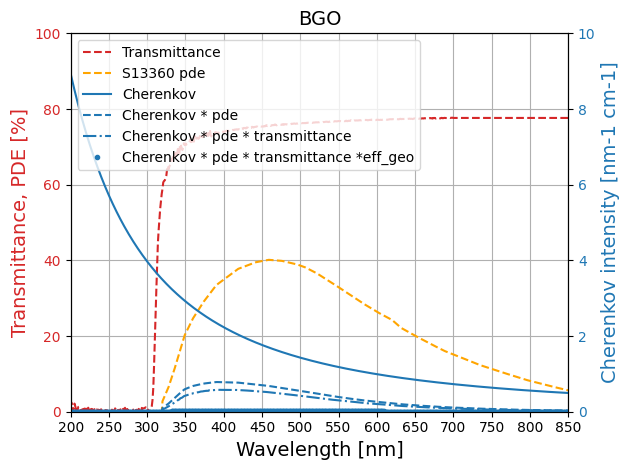

In [74]:
fig, ax1 = plt.subplots()

x = np.arange(200, 900, 1)

color = 'tab:red'
ax1.set_xlabel('Wavelength [nm]', fontsize=14)
ax1.set_ylabel('Transmittance, PDE [%]', color=color, fontsize=14)
ax1.plot(x, i_BGO_t(x), '--', color=color, label='Transmittance')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim(-0, 100)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Cherenkov intensity [nm-1 cm-1]', color=color, fontsize=14)
ax2.plot(x, d2Ndxdlamb(x, BGO_n, z, beta), '-', color=color, label='Cherenkov')
ax2.plot(x, d2Ndxdlamb(x, BGO_n, z, beta)*i_sipm_pde(x)/100, '--', color=color, label='Cherenkov * pde')
ax2.plot(x, d2Ndxdlamb(x, BGO_n, z, beta)*i_sipm_pde(x)/100*i_BGO_t(x)/100, '-.', color=color, label='Cherenkov * pde * transmittance')
ax2.plot(x, d2Ndxdlamb(x, BGO_n, z, beta)*i_sipm_pde(x)/100*i_BGO_t(x)/100*eff_geo, '.', color=color, label='Cherenkov * pde * transmittance *eff_geo')

ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(-0., 10)  # Adjusted ylim for better visualization

line_pde, = ax1.plot(x, i_sipm_pde(x)/1, '--', color='orange', label='S13360 pde')  # Assuming i_sipm_pde is defined elsewhere

# Combine handles and labels for legend
handles, labels = ax1.get_legend_handles_labels()
handles.extend(ax2.get_legend_handles_labels()[0])  # Only the handles are needed from the second legend
labels.extend(ax2.get_legend_handles_labels()[1])

# Create the combined legend
plt.legend(handles, labels, loc='upper left')

plt.title('BGO', size=14)

ax1.grid()
ax1.set_xticks(np.arange(200, 901, 50))
ax1.set_xlim(200, 850)
fig.tight_layout()

#plt.yscale('log')

plt.show()


In [75]:
lambd1, lambd2 = 200, 900
cher_phot = dNdx(lambd1, lambd2, BGO_n, z, beta)
print(f'Generated Cherenkov photons in [{lambd1}-{lambd2}] nm: {cher_phot:.2f} photons/cm\n')

Generated Cherenkov photons in [200-900] nm: 1389.52 photons/cm



In [76]:
lambd1, lambd2 = 200, 900
x = np.arange(lambd1, lambd2)
cher_phot = np.sum(d2Ndxdlamb(x, BGO_n, z, beta)*i_sipm_pde(x)/100*i_BGO_t(x)/100*eff_geo)
print(f'Cherenkov photons * pde * transmittance * eff_geo in [{lambd1}-{lambd2}] nm: {cher_phot:.2f} photons/cm\n')

Cherenkov photons * pde * transmittance * eff_geo in [200-900] nm: 4.30 photons/cm



## PWO

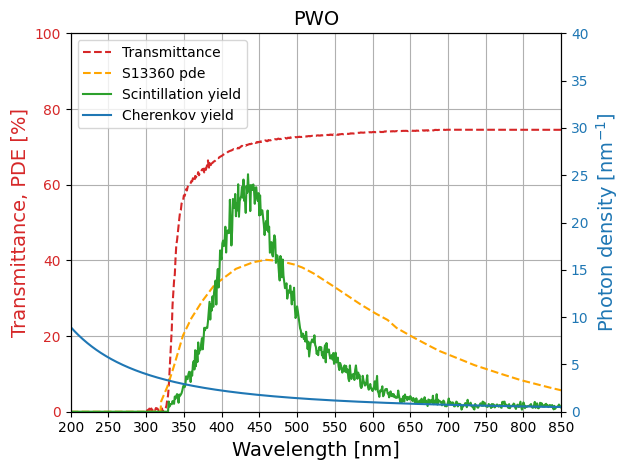

In [84]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Wavelength [nm]', fontsize=14)
ax1.set_ylabel('Transmittance, PDE [%]', color=color, fontsize=14)
ax1.plot(x, i_PWO_t(x), '--', color=color, label='Transmittance')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim(-0, 100)

x = np.arange(200, 900, 1)
line_pde, = ax1.plot(x, i_sipm_pde(x)/1, '--', color='orange', label='S13360 pde')  # Assuming i_sipm_pde is defined elsewhere

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Photon density [nm$^{-1}$]', color=color, fontsize=14)
ax2.plot(x, i_PWO_e(x)/(i_PWO_e(x).sum())*PWO_sphotons, '-', color='C2', label='Scintillation yield')
ax2.plot(x, d2Ndxdlamb(x, PWO_n, z, beta), '-', color=color, label='Cherenkov yield')
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(-0., 40)  # Adjusted ylim for better visualization


# Combine handles and labels for legend
handles, labels = ax1.get_legend_handles_labels()
handles.extend(ax2.get_legend_handles_labels()[0])  # Only the handles are needed from the second legend
labels.extend(ax2.get_legend_handles_labels()[1])

# Create the combined legend
plt.legend(handles, labels, loc='upper left')

plt.title('PWO', size=14)

ax1.grid()
ax1.set_xticks(np.arange(200, 901, 50))
ax1.set_xlim(200, 850)
fig.tight_layout()

plt.savefig('PWO_Cherenkov.png', dpi=300, bbox_inches='tight')
plt.show()


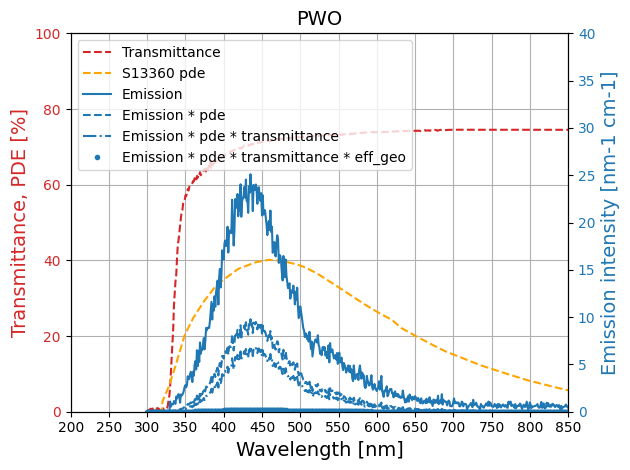

In [85]:
fig, ax1 = plt.subplots()

x = np.arange(300, 900, 1)

color = 'tab:red'
ax1.set_xlabel('Wavelength [nm]', fontsize=14)
ax1.set_ylabel('Transmittance, PDE [%]', color=color, fontsize=14)
ax1.plot(x, i_PWO_t(x), '--', color=color, label='Transmittance')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim(-0, 100)
line_pde, = ax1.plot(x, i_sipm_pde(x)/1, '--', color='orange', label='S13360 pde')  # Assuming i_sipm_pde is defined elsewhere

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Emission intensity [nm-1 cm-1]', color=color, fontsize=14)
ax2.plot(x, i_PWO_e(x)/(i_PWO_e(x).sum())*PWO_sphotons, '-', color=color, label='Emission')
ax2.plot(x, i_PWO_e(x)/(i_PWO_e(x).sum())*PWO_sphotons*i_sipm_pde(x)/100, '--', color=color, label='Emission * pde')
ax2.plot(x, i_PWO_e(x)/(i_PWO_e(x).sum())*PWO_sphotons*i_sipm_pde(x)/100*i_PWO_t(x)/100, '-.', color=color, label='Emission * pde * transmittance')
ax2.plot(x, i_PWO_e(x)/(i_PWO_e(x).sum())*PWO_sphotons*i_sipm_pde(x)/100*i_PWO_t(x)/100*eff_geo, '.', color=color, label='Emission * pde * transmittance * eff_geo')

ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(-0., 40)  # Adjusted ylim for better visualization


# Combine handles and labels for legend
handles, labels = ax1.get_legend_handles_labels()
handles.extend(ax2.get_legend_handles_labels()[0])  # Only the handles are needed from the second legend
labels.extend(ax2.get_legend_handles_labels()[1])

# Create the combined legend
plt.legend(handles, labels, loc='upper left')

plt.title('PWO', size=14)

ax1.grid()
ax1.set_xticks(np.arange(200, 901, 50))
ax1.set_xlim(200, 850)
fig.tight_layout()

#plt.savefig('PWO_Cherenkov.png', dpi=300, bbox_inches='tight')
plt.show()


In [86]:
print(f'Generated Scintillation photons: {PWO_sphotons:.0f} photons/cm\n')

Generated Scintillation photons: 3146 photons/cm



In [87]:
lambd1, lambd2 = 300, 900
eff_geo = ((3*3)/(12*12))*0.5
x = np.arange(lambd1, lambd2)
scint_phot = np.sum(i_PWO_e(x)/i_PWO_e(x).sum()*PWO_sphotons*i_sipm_pde(x)/100*i_PWO_t(x)/100*eff_geo)
print(f'scint photons * pde * transmittance * eff_geo in [{lambd1}-{lambd2}] nm: {scint_phot:.2f} photons/cm\n')

scint photons * pde * transmittance * eff_geo in [300-900] nm: 24.04 photons/cm



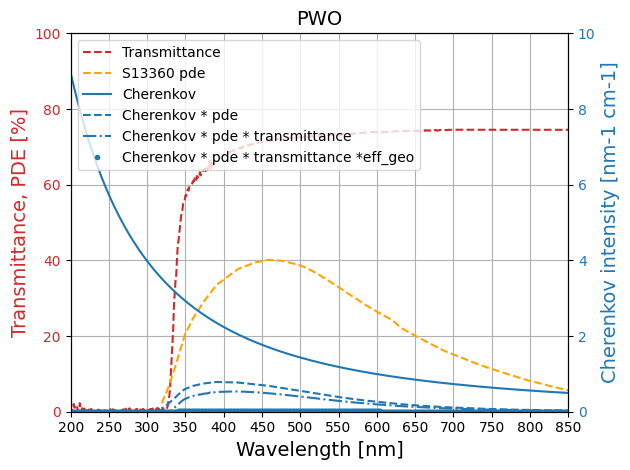

In [91]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Wavelength [nm]', fontsize=14)
ax1.set_ylabel('Transmittance, PDE [%]', color=color, fontsize=14)
ax1.plot(x, i_PWO_t(x), '--', color=color, label='Transmittance')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim(-0, 100)

x = np.arange(200, 900, 1)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Cherenkov intensity [nm-1 cm-1]', color=color, fontsize=14)
ax2.plot(x, d2Ndxdlamb(x, PWO_n, z, beta), '-', color=color, label='Cherenkov')
ax2.plot(x, d2Ndxdlamb(x, PWO_n, z, beta)*i_sipm_pde(x)/100, '--', color=color, label='Cherenkov * pde')
ax2.plot(x, d2Ndxdlamb(x, PWO_n, z, beta)*i_sipm_pde(x)/100*i_PWO_t(x)/100, '-.', color=color, label='Cherenkov * pde * transmittance')
ax2.plot(x, d2Ndxdlamb(x, PWO_n, z, beta)*i_sipm_pde(x)/100*i_PWO_t(x)/100*eff_geo, '.', color=color, label='Cherenkov * pde * transmittance *eff_geo')

ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(-0., 10)  # Adjusted ylim for better visualization

line_pde, = ax1.plot(x, i_sipm_pde(x)/1, '--', color='orange', label='S13360 pde')  # Assuming i_sipm_pde is defined elsewhere

# Combine handles and labels for legend
handles, labels = ax1.get_legend_handles_labels()
handles.extend(ax2.get_legend_handles_labels()[0])  # Only the handles are needed from the second legend
labels.extend(ax2.get_legend_handles_labels()[1])

# Create the combined legend
plt.legend(handles, labels, loc='upper left')

plt.title('PWO', size=14)

ax1.grid()
ax1.set_xticks(np.arange(200, 901, 50))
ax1.set_xlim(200, 850)
fig.tight_layout()

#plt.yscale('log')

plt.show()


In [92]:
lambd1, lambd2 = 200, 900
cher_phot = dNdx(lambd1, lambd2, PWO_n, z, beta)
print(f'Generated Cherenkov photons in [{lambd1}-{lambd2}] nm: {cher_phot:.2f} photons/cm\n')

Generated Cherenkov photons in [200-900] nm: 1393.15 photons/cm



In [93]:
lambd1, lambd2 = 200, 900
x = np.arange(lambd1, lambd2)
cher_phot = np.sum(d2Ndxdlamb(x, PWO_n, z, beta)*i_sipm_pde(x)/100*i_PWO_t(x)/100*eff_geo)
print(f'Cherenkov photons * pde * transmittance * eff_geo in [{lambd1}-{lambd2}] nm: {cher_phot:.2f} photons/cm\n')

Cherenkov photons * pde * transmittance * eff_geo in [200-900] nm: 3.93 photons/cm

